## ONLY CORE STUFFS FOR SIMPLICITTY, ADD MORE AS YOU WISH

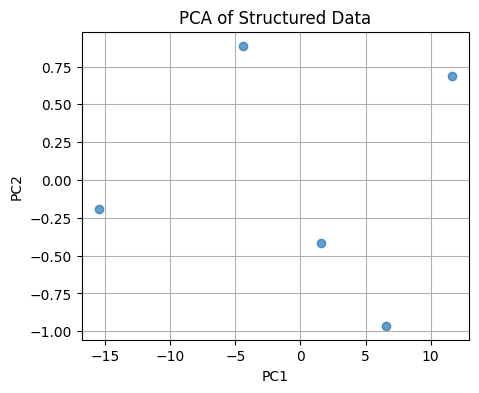

Note 1 → Cluster 1
Note 2 → Cluster 0
Note 3 → Cluster 0
Note 4 → Cluster 1
Note 5 → Cluster 0
Cluster 0 top terms: hypertension, patient, diagnosed, advised, diagnosis
Cluster 1 top terms: diabetes, patient, prescribed, medication, hypertension


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# — Data —
df = pd.DataFrame({
    'PatientID':[1,2,3,4,5],
    'Age':[34,45,23,50,40],
    'Gender':['M','F','F','M','M'],
    'Diagnosis':['Diabetes','Hypertension','Asthma','Diabetes','Hypertension']
})
notes = [
    "Patient has a history of hypertension and diabetes. Prescribed medication X.",
    "Asthma diagnosis confirmed. Patient advised to use inhaler daily.",
    "Hypertension patient. Needs regular monitoring of blood pressure.",
    "Diabetes patient. Recommended diet and exercise.",
    "Patient diagnosed with hypertension. Medication Y prescribed."
]

# — Structured → PCA —
df['Gender'] = df['Gender'].map({'M':0,'F':1})
X_struct = pd.get_dummies(df.drop('PatientID',axis=1))
pc = PCA(n_components=2).fit_transform(X_struct)

# — Notes → TF‑IDF → KMeans —
vect = TfidfVectorizer(max_features=10, stop_words='english')
X_txt = vect.fit_transform(notes).toarray()
km = KMeans(n_clusters=2, random_state=0).fit(X_txt)

# — Plot PCA result —
plt.figure(figsize=(5,4))
plt.scatter(pc[:,0], pc[:,1], alpha=0.7)
plt.title('PCA of Structured Data'); plt.xlabel('PC1'); plt.ylabel('PC2')
plt.grid(True); plt.show()

# — Print note clusters & top terms —
for i, lab in enumerate(km.labels_):
    print(f"Note {i+1} → Cluster {lab}")
terms = vect.get_feature_names_out()
for c in range(2):
    top = terms[km.cluster_centers_[c].argsort()[::-1][:5]]
    print(f"Cluster {c} top terms:", ', '.join(top))
